# Exploratory Data Anlysis

In [1]:
import csv
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## S1: Data Description

1. Read in csv file into pandas dataframe

In [2]:
data_df = pd.read_csv("all_data.csv")

In [3]:
type(data_df)

pandas.core.frame.DataFrame

2. Visualize the dataframe to gain a basic understanding of features and samples

In [4]:
data_df.head

<bound method NDFrame.head of              state  education  year  state_legislature  governor  lt_governor  \
0          Alabama      1.180  2020              0.157       1.0          0.0   
1           Alaska      1.014  2020              0.367       0.0          0.0   
2          Arizona      1.112  2020              0.389       0.0          0.0   
3         Arkansas      1.115  2020              0.259       0.0          0.0   
4       California      1.099  2020              0.308       0.0          1.0   
..             ...        ...   ...                ...       ...          ...   
495       Virginia      1.115  2011              0.193       0.0          0.0   
496     Washington      1.058  2011              0.320       1.0          0.0   
497  West Virginia      1.113  2011              0.179       0.0          0.0   
498      Wisconsin      1.104  2011              0.258       0.0          1.0   
499        Wyoming      1.010  2011              0.144       0.0          0.0  

In [5]:
data_df.columns

Index(['state', 'education', 'year', 'state_legislature', 'governor',
       'lt_governor', 'labour_force_participation', 'mngmt_job_wage_gap',
       'bachelor_wage_gap', 'ab_legality', 'rape_rate', 'sex_ratio_birth',
       'abortion_rate', 'life_exp_f_m'],
      dtype='object')

We have 500 samples and 15 features

3. Check missing values

In [6]:
null_sum = data_df.isnull().sum()
null_sum

state                         0
education                     0
year                          0
state_legislature             0
governor                      0
lt_governor                   0
labour_force_participation    0
mngmt_job_wage_gap            0
bachelor_wage_gap             0
ab_legality                   0
rape_rate                     0
sex_ratio_birth               0
abortion_rate                 0
life_exp_f_m                  0
dtype: int64

There is no missing data in our dataset, because when we collected data for seperate features, our data source was census data which appeared to contain no NaN

4. Check column types

In [7]:
data_df.dtypes

state                          object
education                     float64
year                            int64
state_legislature             float64
governor                      float64
lt_governor                   float64
labour_force_participation    float64
mngmt_job_wage_gap            float64
bachelor_wage_gap             float64
ab_legality                     int64
rape_rate                     float64
sex_ratio_birth               float64
abortion_rate                 float64
life_exp_f_m                  float64
dtype: object

## S2: Visualization of relation between features and target value

### 1. Explore the relation between political empowerment and rape rate

Text(0.5, 1.0, 'Bar graph between female governer and rape rate')

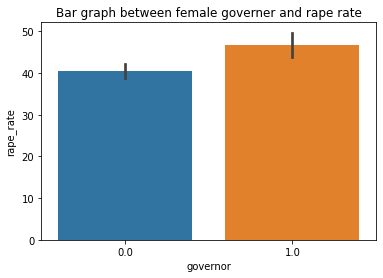

In [8]:
sns.barplot(data=data_df, x="governor", y="rape_rate")
plt.title("Bar graph between female governer and rape rate")

Text(0.5, 1.0, 'Bar graph between female lieutenant governer and rape rate')

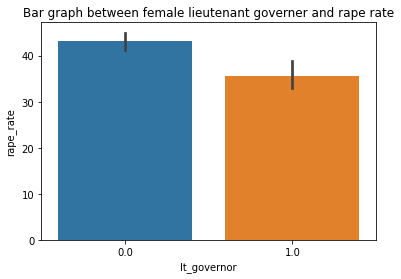

In [9]:
sns.barplot(data=data_df, x="lt_governor", y="rape_rate")
plt.title("Bar graph between female lieutenant governer and rape rate")

Use boxplot to detect and drop outliers

In [10]:
Q1 = data_df["state_legislature"].quantile(0.25)
Q3 = data_df["state_legislature"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.199, 0.30425, 0.041124999999999995, 0.462125)

In [11]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["state_legislature"] > 0.462].index, inplace=True)
data_df.drop(data_df[data_df["state_legislature"] < 0.041].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (500, 14)
Data size after dropping: (498, 14)


Text(0.5, 1.0, 'Bar graph between state legislature and rape rate')

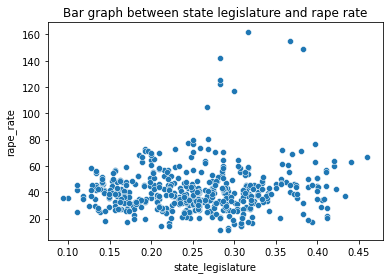

In [12]:
sns.scatterplot(data=data_df[["state_legislature", "rape_rate"]], x="state_legislature", y="rape_rate")
plt.title("Bar graph between state legislature and rape rate")

<b>Observation on state legislature female propotion</b>

We don't see a clear and conspicuous trend between state legislature gender ratio and rape rate

### 2. Explore the relation between education gender gap and rape rate

2.1 Use boxplot to detect and drop outliers

In [13]:
# Detect education gender gap (high school, bachelor, and graduate school) outliers
Q1 = data_df["education"].quantile(0.25)
Q3 = data_df["education"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.08525, 1.141, 1.0016250000000002, 1.224625)

In [14]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["education"] > 1.2246].index, inplace=True)
data_df.drop(data_df[data_df["education"] < 1.0016].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (498, 14)
Data size after dropping: (483, 14)


2.2 Visualize the scatter plot after dropping outliers

Text(0.5, 1.0, 'Scatter plot between education gender gap and rape rate')

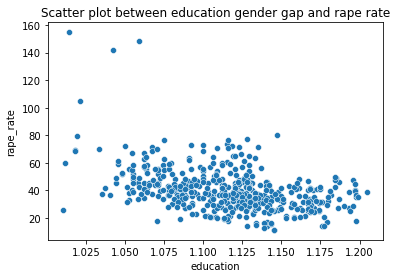

In [15]:
sns.scatterplot(data=data_df[["education", "rape_rate"]], x="education", y="rape_rate")
plt.title("Scatter plot between education gender gap and rape rate")

<b>Observation on education gender gap and rape rate</b>

After dropping outliers, we see a slight negative relation between education gender gap and rape rate, which means a higher proportion of female in high school and higher education system tends to correspond to a lower rape rate

### 3. Explore the relation between economic gender gap and rape rate

3.1 Use boxplot to detect and drop outliers for economic gender gap

In [16]:
# Detect labor force participation gender gap
Q1 = data_df["labour_force_participation"].quantile(0.25)
Q3 = data_df["labour_force_participation"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.803, 0.863, 0.7130000000000001, 0.9529999999999998)

In [17]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["labour_force_participation"] > 0.953].index, inplace=True)
data_df.drop(data_df[data_df["labour_force_participation"] < 0.713].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (483, 14)
Data size after dropping: (483, 14)


In [18]:
# Detect labor management job wage gender gap gender gap
Q1 = data_df["mngmt_job_wage_gap"].quantile(0.25)
Q3 = data_df["mngmt_job_wage_gap"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.683, 0.7355, 0.6042500000000001, 0.81425)

In [19]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["mngmt_job_wage_gap"] > 0.814].index, inplace=True)
data_df.drop(data_df[data_df["mngmt_job_wage_gap"] < 0.604].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (483, 14)
Data size after dropping: (466, 14)


In [20]:
# Detect bachelor wage gender gap
Q1 = data_df["bachelor_wage_gap"].quantile(0.25)
Q3 = data_df["bachelor_wage_gap"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(18.3, 22.1, 12.6, 27.800000000000004)

In [21]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["bachelor_wage_gap"] > 27.8].index, inplace=True)
data_df.drop(data_df[data_df["bachelor_wage_gap"] < 12.6].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (466, 14)
Data size after dropping: (455, 14)


3.2 Visualize the relation between economic gender gap and rape rate after dropping outliers

Text(0.5, 1.0, 'Scatter plot between labor force participation gender gap and rape rate')

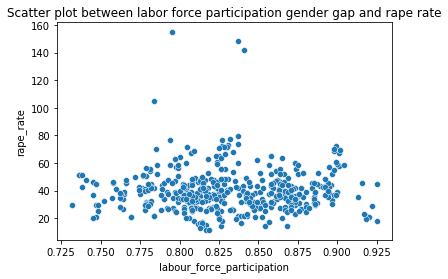

In [22]:
sns.scatterplot(data=data_df[["labour_force_participation", "rape_rate"]], x="labour_force_participation", y="rape_rate")
plt.title("Scatter plot between labor force participation gender gap and rape rate")

Text(0.5, 1.0, 'Scatter plot between management job gender wage gap and rape rate')

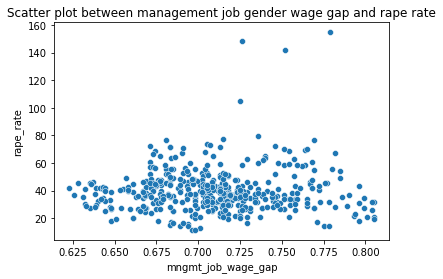

In [23]:
sns.scatterplot(data=data_df[["mngmt_job_wage_gap", "rape_rate"]], x="mngmt_job_wage_gap", y="rape_rate")
plt.title("Scatter plot between management job gender wage gap and rape rate")

Text(0.5, 1.0, 'Scatter plot between bachlor gender wage gap and rape rate')

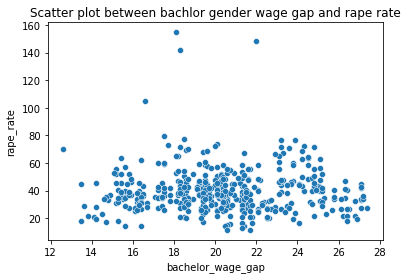

In [24]:
sns.scatterplot(data=data_df[["bachelor_wage_gap", "rape_rate"]], x="bachelor_wage_gap", y="rape_rate")
plt.title("Scatter plot between bachlor gender wage gap and rape rate")

<b>Observation on economic gender gap and rape rate</b>

After dropping outliers, we see no clear and salient relation between economic gender gap and rape rate, including labor force participation gender discrepency, management job wage gender gap, and bachelor gender gap

### 4. Explore the relation between health gender gap and rape rate

4.1 Use boxplot to detect and drop outliers for health gender gap

In [25]:
# Detect life expectancy gender gap
Q1 = data_df["life_exp_f_m"].quantile(0.25)
Q3 = data_df["life_exp_f_m"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.0593220338983051, 1.070663811563169, 1.0423093674010093, 1.0876764780604649)

In [26]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["life_exp_f_m"] > 1.088].index, inplace=True)
data_df.drop(data_df[data_df["life_exp_f_m"] < 1.042].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (455, 14)
Data size after dropping: (448, 14)


In [27]:
# Detect sex ratio at birth gender gap
Q1 = data_df["sex_ratio_birth"].quantile(0.25)
Q3 = data_df["sex_ratio_birth"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.011122345803842, 1.0493179433368311, 0.9538289495043585, 1.1066113396363146)

In [28]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["sex_ratio_birth"] > 1.1066].index, inplace=True)
data_df.drop(data_df[data_df["sex_ratio_birth"] < 0.954].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (448, 14)
Data size after dropping: (437, 14)


4.2 Visualize the relation between health gender gap and rape rate

Text(0.5, 1.0, 'Scatter plot between life expectancy (female/male) and rape rate')

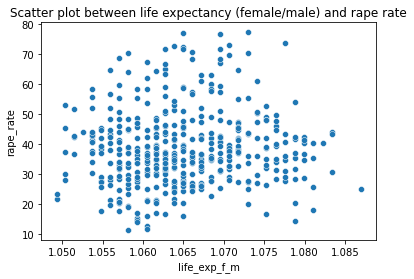

In [29]:
sns.scatterplot(data=data_df[["life_exp_f_m", "rape_rate"]], x="life_exp_f_m", y="rape_rate")
plt.title("Scatter plot between life expectancy (female/male) and rape rate")

Text(0.5, 1.0, 'Scatter plot between sex ratio at birth and rape rate')

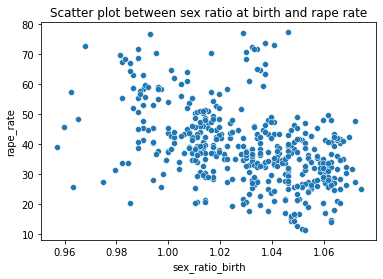

In [30]:
sns.scatterplot(data=data_df[["sex_ratio_birth", "rape_rate"]], x="sex_ratio_birth", y="rape_rate")
plt.title("Scatter plot between sex ratio at birth and rape rate")

<b>Observation on health gender gap and rape rate</b>

1. From the above two scatter plots, we see no clear and salient correlation between life expectancy rate and rape rate
2. There is a negative relation between sex ration at birth gender gap and rape rate, which means a higher female proportion of population at birth is likely to correspond to a lower crime rate

### 5. Explore relation between abortion and rape rate

Text(0.5, 1.0, 'Bar graph between ab_legality and rape rate')

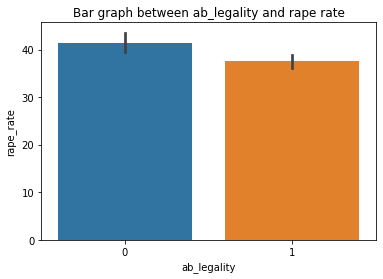

In [31]:
sns.barplot(data=data_df, x="ab_legality", y="rape_rate")
plt.title("Bar graph between ab_legality and rape rate")

In [32]:
# Detect abortion rate outliers
Q1 = data_df["abortion_rate"].quantile(0.25)
Q3 = data_df["abortion_rate"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(122.843, 265.672, -91.40050000000001, 479.91550000000007)

In [33]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["abortion_rate"] > 479.916].index, inplace=True)
data_df.drop(data_df[data_df["abortion_rate"] < 0].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (437, 14)
Data size after dropping: (419, 14)


Text(0.5, 1.0, 'Scatter plot between abortion rate and rape rate')

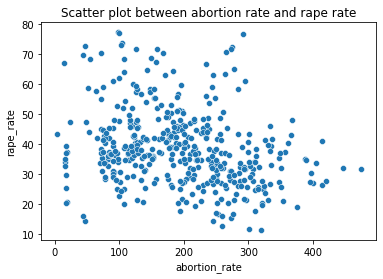

In [34]:
sns.scatterplot(data=data_df[["abortion_rate", "rape_rate"]], x="abortion_rate", y="rape_rate")
plt.title("Scatter plot between abortion rate and rape rate")

<b>Observtaion on abortion rate and rape rate</b>

From the above scatter plot, we see a slight negative relation between abortion rate and rape rate

### A comprehensive visualization of the relationship between features and target variables

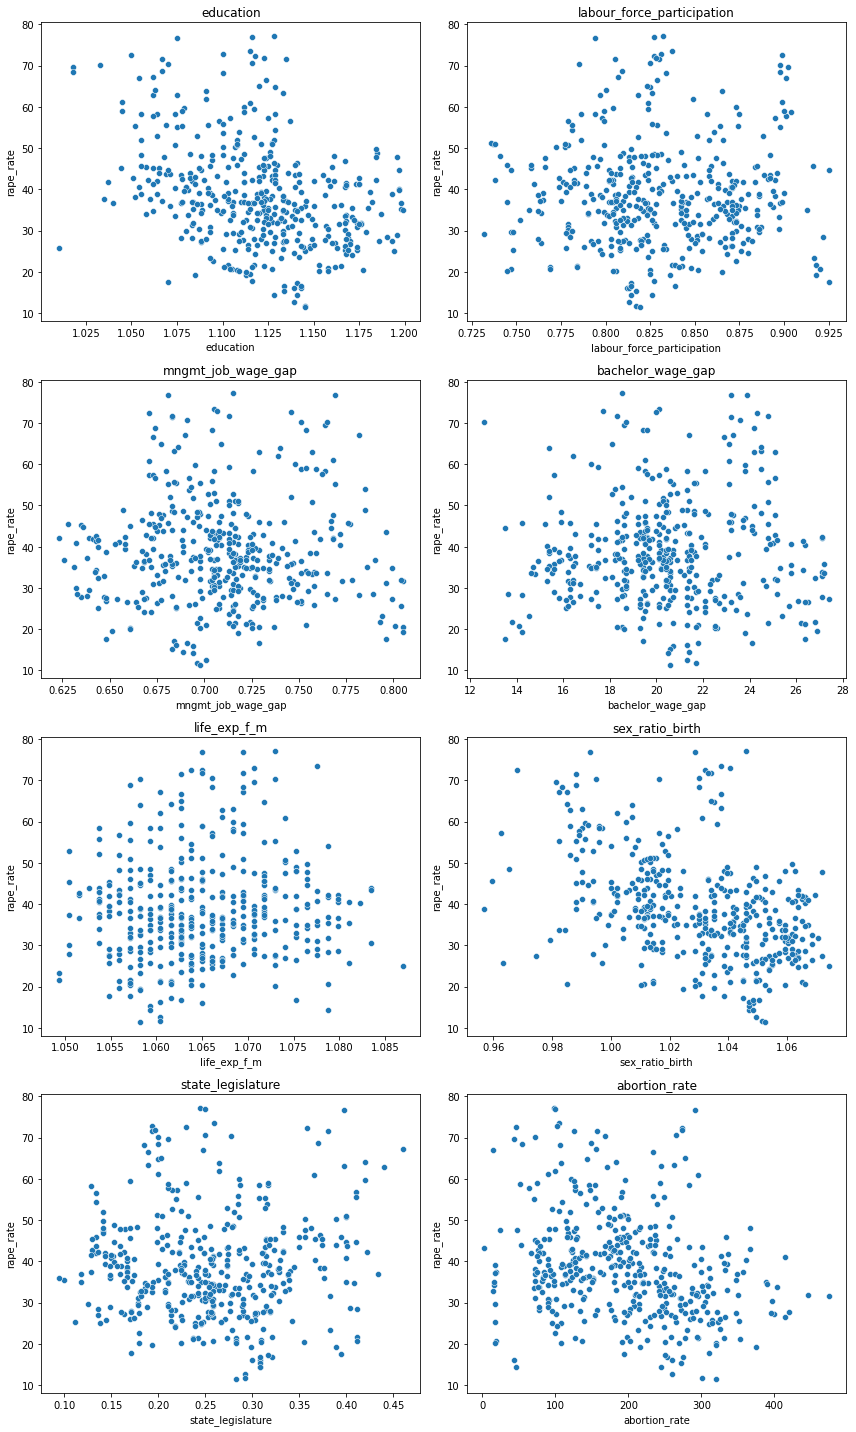

In [35]:
data = data_df[["education", "labour_force_participation", 
                "mngmt_job_wage_gap", "bachelor_wage_gap", "life_exp_f_m", 
                "sex_ratio_birth", "state_legislature", "abortion_rate", "rape_rate"]]
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

for i in range(4):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns) - 1:
            sns.scatterplot(data=data, x=data.columns[col], y="rape_rate", ax=axs[i][j])
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Comprehensive Observation</b>
* In the first scatter plot, we see a negative relation between high school graduates gender gap and rape rate, which means the higher proportion of female population high school and higher education, the lower rape rate there tend to be.

* In the sixth scatter plot, we see a negative relation between sex ratio at birth (female/male) and rape rate, which means the higher proportion of male at birth population is likely to correspond to a higher rape rate

* In the eighth scatter plot, we see a slightly negative relation between abortion rate and rape rate, which means a higher abortion rate is likely to correspond to a rape rate.

* Overall, each individual feature is not strongly correlated to our target value -- rape rate. This is probabily because these features are interconnected and mediated by other hidden factors.

## S3: Visualization of Features and Distribution

1. Distribution of education gender gap

Text(0.5, 1.0, 'Education Gender Gap Distribution')

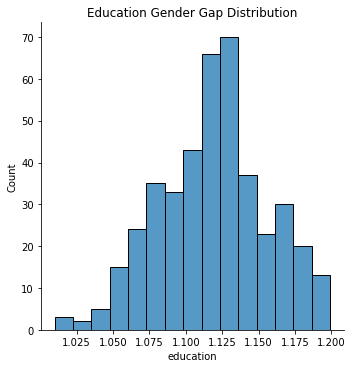

In [37]:
sns.displot(data_df, x="education")
plt.title("Education Gender Gap Distribution")

2. Distribution of economic gender gap

Text(0.5, 1.0, 'Labor Force Participation Gender Gap Distribution')

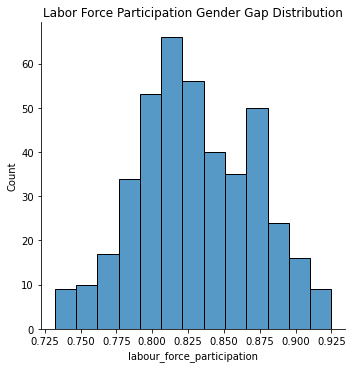

In [38]:
sns.displot(data_df, x="labour_force_participation")
plt.title("Labor Force Participation Gender Gap Distribution")

Text(0.5, 1.0, 'Management Job Wage Gender Gap Distribution')

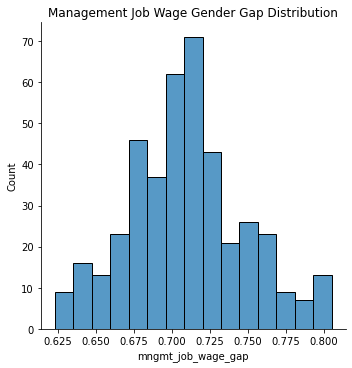

In [39]:
sns.displot(data_df, x="mngmt_job_wage_gap")
plt.title("Management Job Wage Gender Gap Distribution")

Text(0.5, 1.0, 'Bachelor Wage Gender Gap Distribution')

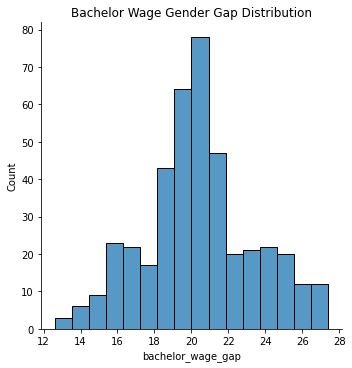

In [40]:
sns.displot(data_df, x="bachelor_wage_gap")
plt.title("Bachelor Wage Gender Gap Distribution")

3. Distribution of Health Gender Gap

Text(0.5, 1.0, 'Life Expectancy Gender Gap Distribution')

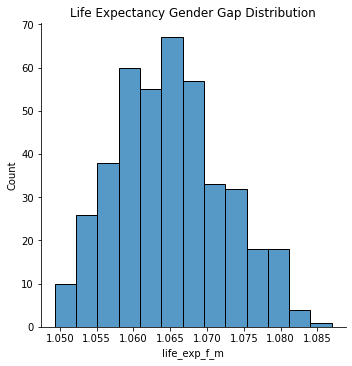

In [41]:
sns.displot(data_df, x="life_exp_f_m")
plt.title("Life Expectancy Gender Gap Distribution")

Text(0.5, 1.0, 'Sex Ratio at Birth Gender Gap Distribution')

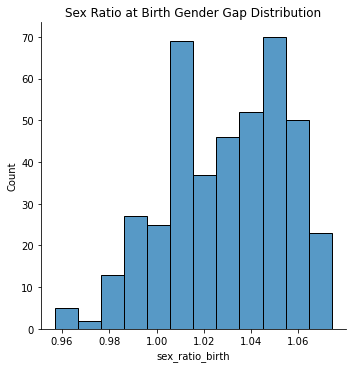

In [42]:
sns.displot(data_df, x="sex_ratio_birth")
plt.title("Sex Ratio at Birth Gender Gap Distribution")

4. Distribution of Political Empowerment

Text(0.5, 1.0, 'State Legislature Gender Gap Distribution')

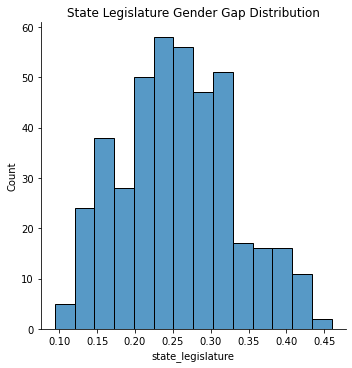

In [43]:
sns.displot(data_df, x="state_legislature")
plt.title("State Legislature Gender Gap Distribution")

5. Distribution of Abortion

Text(0.5, 1.0, 'Abortion Rate Distribution')

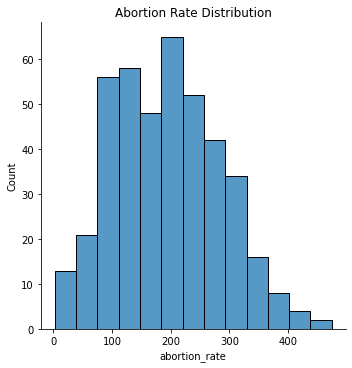

In [44]:
sns.displot(data_df, x="abortion_rate")
plt.title("Abortion Rate Distribution")

A Complete Figure of All Feature Distributions

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

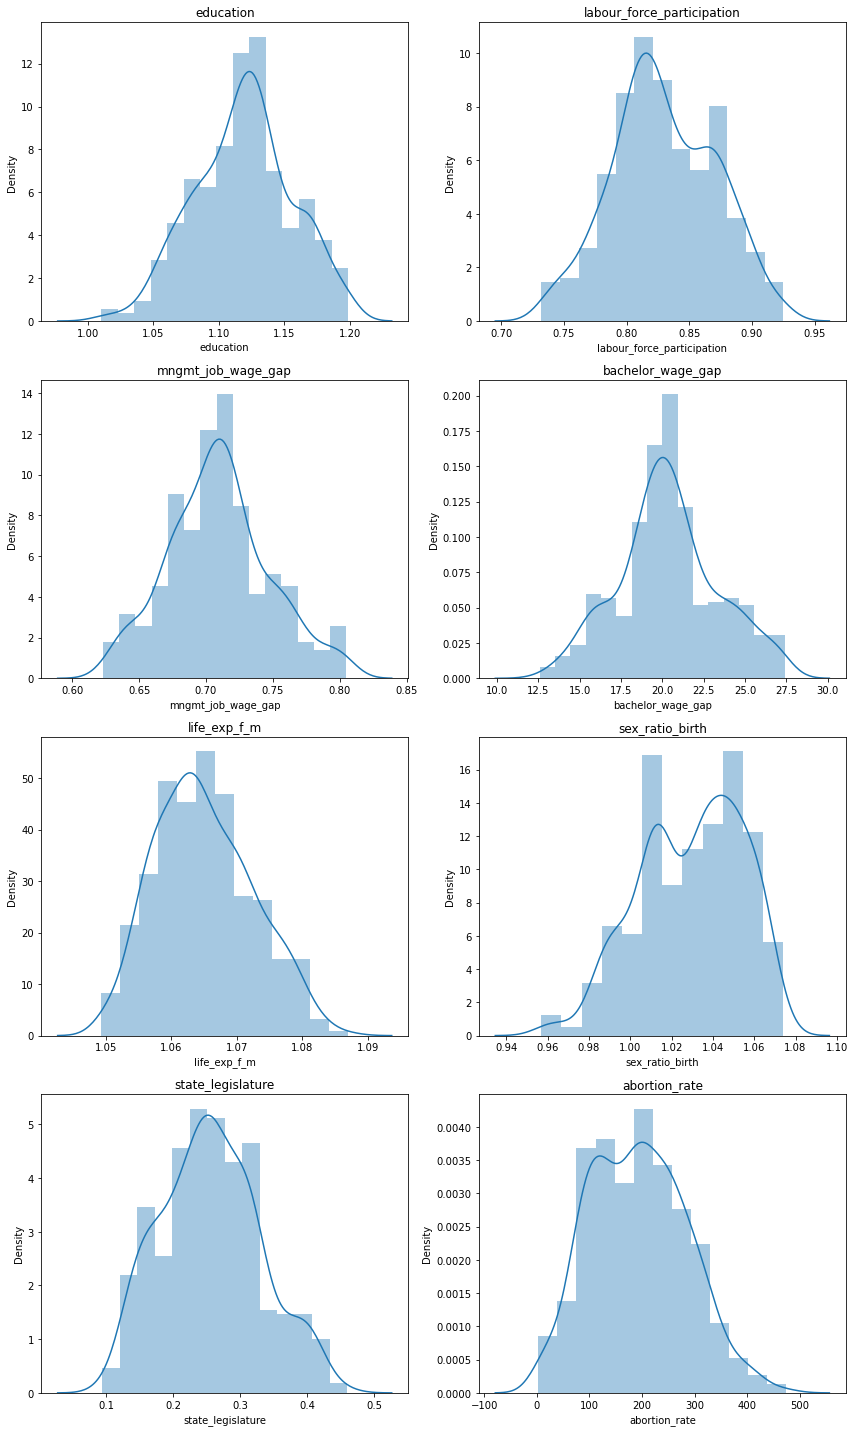

In [46]:
data = data_df[["education", "labour_force_participation", 
           "mngmt_job_wage_gap", "bachelor_wage_gap", "life_exp_f_m", 
           "sex_ratio_birth", "state_legislature", "abortion_rate"]]
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

for i in range(4):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns):
            sns.distplot(data[data.columns[col]], ax=axs[i][j], kde=True)
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observation</b>
1. From the first distribution, we see that the mean of high school graduates gender gap is around 0.95. This means male comprise a larger proportion of the total high school graduates.

2. The second and third distributions show an opposite trend, in which bachelor and professional graduates are likely to consist of female, which a mean of 1.12 and 1.1 respectively. Compare the first three distribution graphs, we see that female are more likely to pursue a higher education degree.

3. We observe a significant gender gap in the economic field:
    * In the 4th graph, we see that the labor force participation distribution has a mean around 0.81 and skewed to the left. This mean and skewness indicate the male's dominance and female's marginalization in the labor force participation

    * In the 5th graph, we see that the management job wage gender gap has a mean of 0.71, which means that on average, women in management jobs earn 80% of what men earn in the same positions. This phenomenon indicates a salient gender gap in the work place, especially for the higher management positions

4. In the 7th graph, we see the distribution of life expectancy ratio has a mean of 0.941, which means male tends to live shorter than female, which makes sense as the World Health Organization (WHO) showed the global life expectancy at birth for males in 2020 was 69 years, while for females it was 73 years.

5. In the 9th graph, we see the distribution of state legislature of women has a mean of 0.27, which is critically low. This mean indicates that among all positions, of which female only occupy 27 percent.

## S4: Explore the Relation Between Features and Abortion Rate

### 4.1 Relation between education gender gap and abortion rate

Text(0.5, 1.0, 'Scatter plot between education gender gap and abortion rate')

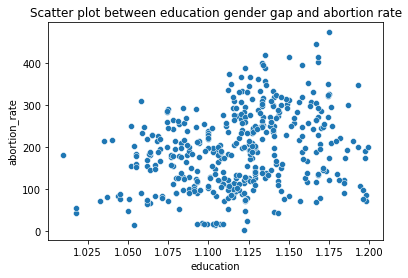

In [47]:
sns.scatterplot(data=data_df[["education", "abortion_rate"]], x="education", y="abortion_rate")
plt.title("Scatter plot between education gender gap and abortion rate")

From the above scatter plot, we observe a positive relation between education gender gap and abortion rate

### 4.2 Relation between economic gender gap and abortion rate

Text(0.5, 1.0, 'Scatter plot between labor force participation gender gap and abortion rate')

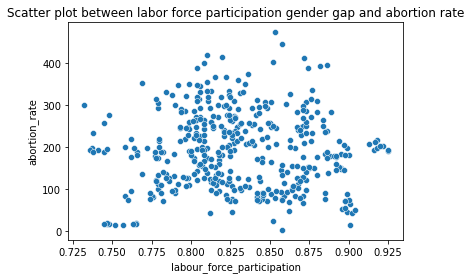

In [48]:
sns.scatterplot(data=data_df[["labour_force_participation", "abortion_rate"]], x="labour_force_participation", y="abortion_rate")
plt.title("Scatter plot between labor force participation gender gap and abortion rate")

Text(0.5, 1.0, 'Scatter plot between management job wage gender gap and abortion rate')

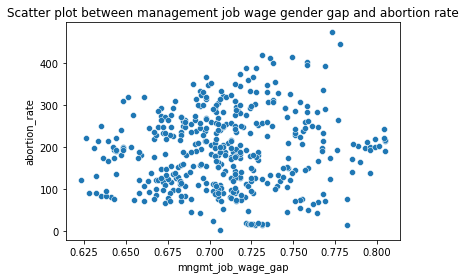

In [49]:
sns.scatterplot(data=data_df[["mngmt_job_wage_gap", "abortion_rate"]], x="mngmt_job_wage_gap", y="abortion_rate")
plt.title("Scatter plot between management job wage gender gap and abortion rate")

Text(0.5, 1.0, 'Scatter plot between bachelor wage gender gap and abortion rate')

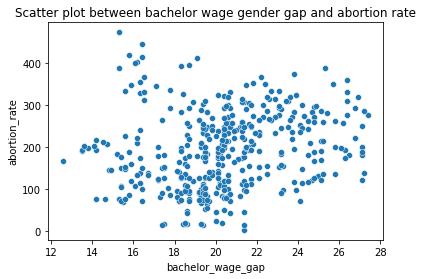

In [50]:
sns.scatterplot(data=data_df[["bachelor_wage_gap", "abortion_rate"]], x="bachelor_wage_gap", y="abortion_rate")
plt.title("Scatter plot between bachelor wage gender gap and abortion rate")

From the above three scatter plots regarding economic gender gap, we don't see a salient relation between economic gender gap and abortion rate

After showing some examples of the scatter plots regarding the relation between gender gap and abortion rate, we will explore a comprehensive visualization between features and abortion rate

## 4.3 Complete Visualization between Features and Abortion Rate

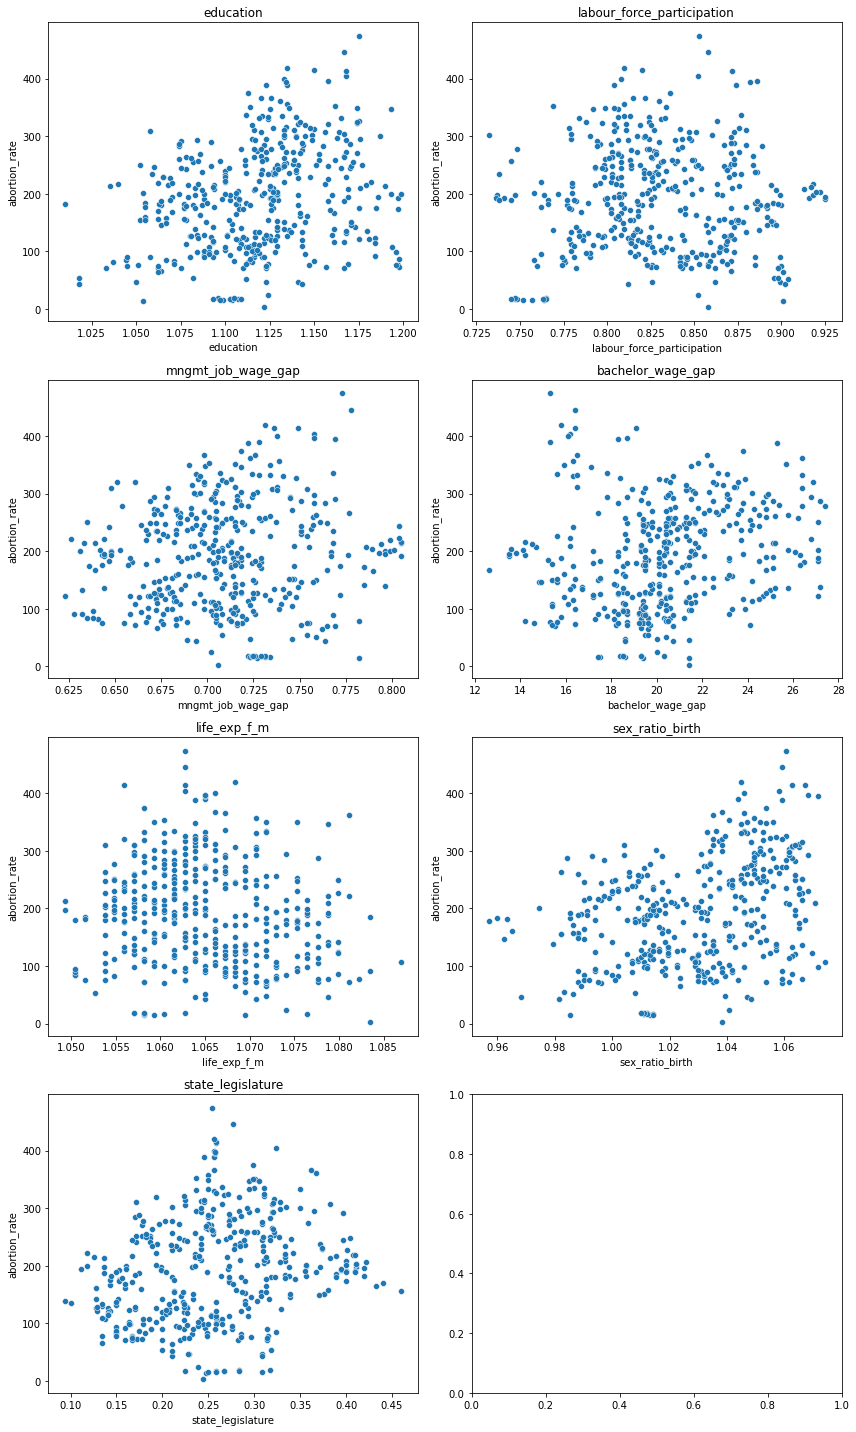

In [51]:
data = data_df[["education", "labour_force_participation", 
                "mngmt_job_wage_gap", "bachelor_wage_gap", "life_exp_f_m", 
                "sex_ratio_birth", "state_legislature", "abortion_rate"]]
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

for i in range(4):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns) - 1:
            sns.scatterplot(data=data, x=data.columns[col], y="abortion_rate", ax=axs[i][j])
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observation on relation between features and abortion rate</b>
* Overall, we do not see a clear and conspicuous correlation between our features and abortion rate
* However, we observed a relatively positive relation between high school graduates gender gap and abortion rate
* We also observed a relatively negative relation between graduate school graduates gender gap and abortion rate